# Analysys of the Moreva et al. experiment



## Preliminaries

In [3]:
# Symbolic computation
from sympy import *
from sympy.physics.matrices import mdft
from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.constants import hbar

In [4]:
# Remeber this to have LaTeX rendered output in Jupyter
init_printing()

## Computation

In [5]:
Omega = Symbol(r'\Omega')
omega = Symbol(r'\omega', real=True)

In [6]:
F = mdft(2)

In [7]:
Omega = I*omega*Matrix([
    [0, 1],
    [-1,0]
])

In [8]:
Omega.eigenvects()

⎡⎛            ⎡⎡-ⅈ⎤⎤⎞  ⎛           ⎡⎡ⅈ⎤⎤⎞⎤
⎢⎜-\omega, 1, ⎢⎢  ⎥⎥⎟, ⎜\omega, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝            ⎣⎣1 ⎦⎦⎠  ⎝           ⎣⎣1⎦⎦⎠⎦

In [9]:
T = (pi / (2*omega)**2) * F.adjoint()*Omega*F

In [10]:
T

⎡           -ⅈ⋅π   ⎤
⎢   0      ────────⎥
⎢          4⋅\omega⎥
⎢                  ⎥
⎢  ⅈ⋅π             ⎥
⎢────────     0    ⎥
⎣4⋅\omega          ⎦

In [11]:
T.eigenvects()

⎡⎛  -π         ⎡⎡ⅈ⎤⎤⎞  ⎛   π         ⎡⎡-ⅈ⎤⎤⎞⎤
⎢⎜────────, 1, ⎢⎢ ⎥⎥⎟, ⎜────────, 1, ⎢⎢  ⎥⎥⎟⎥
⎣⎝4⋅\omega     ⎣⎣1⎦⎦⎠  ⎝4⋅\omega     ⎣⎣1 ⎦⎦⎠⎦

In [12]:
T_d = diag(-pi/(4*omega), pi/(4*omega))

In [13]:
T_d

⎡  -π              ⎤
⎢────────     0    ⎥
⎢4⋅\omega          ⎥
⎢                  ⎥
⎢             π    ⎥
⎢   0      ────────⎥
⎣          4⋅\omega⎦

Check: this is what we would obtain with matric of cols egeinv

In [14]:
R = (1/sqrt(2)) * Matrix([
    [I, -I],
    [1, 1]
])

In [15]:
R.adjoint()*T*R

⎡  -π              ⎤
⎢────────     0    ⎥
⎢4⋅\omega          ⎥
⎢                  ⎥
⎢             π    ⎥
⎢   0      ────────⎥
⎣          4⋅\omega⎦

In [16]:
Omega_T_d = (pi/((pi/(2*omega))**2))*F*T_d*F.adjoint()

In [17]:
Omega_T_d

⎡   0     -\omega⎤
⎢                ⎥
⎣-\omega     0   ⎦

In [18]:
Hs = I*hbar*omega*Matrix([
    [0, 1],
    [-1,0]
])

In [19]:
simplify(exp(I*pi/4))

In [20]:
J = TensorProduct(hbar*Omega_T_d, eye(2)) + TensorProduct(eye(2), Hs)

In [21]:
J

⎡     0       ℏ⋅ⅈ⋅\omega   -ℏ⋅\omega       0     ⎤
⎢                                                ⎥
⎢-ℏ⋅ⅈ⋅\omega      0            0       -ℏ⋅\omega ⎥
⎢                                                ⎥
⎢ -ℏ⋅\omega       0            0       ℏ⋅ⅈ⋅\omega⎥
⎢                                                ⎥
⎣     0       -ℏ⋅\omega   -ℏ⋅ⅈ⋅\omega      0     ⎦

In [22]:
J.eigenvects()

⎡⎛      ⎡⎡0 ⎤  ⎡ⅈ⎤⎤⎞  ⎛                ⎡⎡-ⅈ⎤⎤⎞  ⎛               ⎡⎡-ⅈ⎤⎤⎞⎤
⎢⎜      ⎢⎢  ⎥  ⎢ ⎥⎥⎟  ⎜                ⎢⎢  ⎥⎥⎟  ⎜               ⎢⎢  ⎥⎥⎟⎥
⎢⎜      ⎢⎢-ⅈ⎥  ⎢0⎥⎥⎟  ⎜                ⎢⎢1 ⎥⎥⎟  ⎜               ⎢⎢-1⎥⎥⎟⎥
⎢⎜0, 2, ⎢⎢  ⎥, ⎢ ⎥⎥⎟, ⎜-2⋅ℏ⋅\omega, 1, ⎢⎢  ⎥⎥⎟, ⎜2⋅ℏ⋅\omega, 1, ⎢⎢  ⎥⎥⎟⎥
⎢⎜      ⎢⎢1 ⎥  ⎢0⎥⎥⎟  ⎜                ⎢⎢-ⅈ⎥⎥⎟  ⎜               ⎢⎢ⅈ ⎥⎥⎟⎥
⎢⎜      ⎢⎢  ⎥  ⎢ ⎥⎥⎟  ⎜                ⎢⎢  ⎥⎥⎟  ⎜               ⎢⎢  ⎥⎥⎟⎥
⎣⎝      ⎣⎣0 ⎦  ⎣1⎦⎦⎠  ⎝                ⎣⎣1 ⎦⎦⎠  ⎝               ⎣⎣1 ⎦⎦⎠⎦

## Comparison with ordinary QM 

In [23]:
def evolve_psi(t, t0, psi0):
    return exp(-I*Hs*(t-t0)/hbar)*psi0

In [24]:
def correction_eigenJ(t, t0, eigenvalue):
    return exp(I*eigenvalue*(t-t0)/hbar)

In [25]:
def correction_timeshift(t, t0, timeshift):
    deltaT = pi/(2*omega)
    omega_prime = (pi*timeshift) / (deltaT**2)
    return exp(-I*omega_prime*(t-t0))

We can identify `timeshift = t0`, in the sense that our initial time is always the smaller eigentime of the clock...

And then set `omega = 1` to facilitate numeric conversion and plotting.

### Plotting

In [26]:
def psi_fixed(t, t0):
    _omega = omega
    _evolve_psi = evolve_psi(t=t, t0=-pi/(4*_omega), psi0=Matrix([0,-I]))
    _correction_timeshift = correction_timeshift(t=pi/(4*_omega), t0=-pi/(4*_omega), timeshift=-pi/(4*_omega)) 
    return (_evolve_psi * _correction_timeshift)

In [28]:
t = Symbol('t')

In [29]:
 psi_fixed_np_h_re = lambdify(t, re(psi_fixed(t, -pi/(4*omega)).subs({omega: 1})[0]), 'numpy') 

In [32]:
 psi_fixed_np_h_im = lambdify(t, im(psi_fixed(t, -pi/(4*omega)).subs({omega: 1})[0]), 'numpy') 

In [33]:
psi_fixed_np_h_re(0)

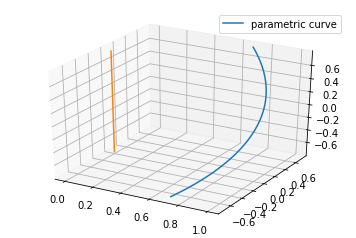

In [38]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

# Prepare arrays x, y, z
z = np.linspace(-np.pi/4, np.pi/4, 100)
x = np.cos(z)
y = np.sin(z)
zero = z - z

ax.plot(x, y, z, label='parametric curve')
ax.plot(zero, zero, z)

ax.legend()

plt.show()
